#### Imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

In [2]:
import wrangle as w

In [3]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [4]:
import random 
random.seed(10)

In [5]:
import re

In [47]:
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

In [7]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [39]:
# read in csv with new features we are exploring
df = pd.read_csv("/Users/manny/codeup-data-science/Pigskin_Paydays/second_iterations_csv's/pivot_final.csv")

In [43]:
# basic checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             458 non-null    object 
 1   team             458 non-null    object 
 2   year             458 non-null    int64  
 3   games_played     458 non-null    float64
 4   comp             458 non-null    float64
 5   att              458 non-null    float64
 6   comp_pct         458 non-null    float64
 7   yds              458 non-null    float64
 8   avg_yds_per_att  458 non-null    float64
 9   td               458 non-null    float64
 10  int              458 non-null    float64
 11  pass_rating      458 non-null    float64
 12  rush_att         458 non-null    float64
 13  rush_yds         458 non-null    float64
 14  rush_avg         458 non-null    float64
 15  rush_td          458 non-null    float64
 16  full_name        458 non-null    object 
 17  year_signed     

In [23]:
# basic checking describe
df.describe()

,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,year_signed,percent_of_cap
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,2015.855895,12.491266,255.052402,405.430131,62.285808,2925.390830,7.119869,18.362445,9.770742,87.617686,37.755459,160.423581,3.506987,1.598253,2016.962882,8.419432
std,3.574309,3.867178,106.422785,158.877575,4.500235,1247.210722,0.795074,10.429699,4.848905,12.360980,28.766190,181.047244,1.910948,2.104532,3.387572,7.066898
min,2010.000000,4.000000,63.000000,121.000000,42.900000,604.000000,4.400000,0.000000,0.000000,46.720000,3.000000,-31.000000,-1.000000,0.000000,2011.000000,0.100000
25%,2013.000000,9.000000,159.000000,262.000000,59.500000,1798.750000,6.600000,9.000000,6.000000,79.095000,18.000000,36.000000,2.100000,0.000000,2014.000000,1.600000
50%,2016.000000,14.000000,266.000000,441.000000,62.250000,3081.500000,7.100000,18.000000,9.000000,87.365000,31.000000,99.000000,3.600000,1.000000,2017.000000,6.450000
75%,2019.000000,16.000000,346.000000,540.750000,65.600000,3964.500000,7.675000,26.000000,13.000000,95.897500,48.000000,227.250000,5.000000,2.000000,2020.000000,14.575000
max,2022.000000,17.000000,485.000000,719.000000,74.400000,5477.000000,9.600000,55.000000,30.000000,122.480000,176.000000,1206.000000,8.500000,14.000000,2023.000000,24.100000


In [24]:
df.head()

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap
0,Rex Grossman,WAS,2010,4.0,74.0,133.0,55.6,884.0,6.6,7.0,4.0,81.16,3.0,6.0,2.0,0.0,Rex Grossman,2015,0.7
1,Rex Grossman,WAS,2011,13.0,265.0,458.0,57.9,3148.0,6.9,16.0,20.0,72.39,20.0,11.0,0.6,1.0,Rex Grossman,2015,0.7
2,Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,85.67,20.0,65.0,3.2,0.0,Matt Flynn,2013,4.7
3,Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,85.67,20.0,65.0,3.2,0.0,Matt Flynn,2013,0.7
4,Jameis Winston,TB,2015,16.0,312.0,535.0,58.3,4042.0,7.6,22.0,15.0,84.19,54.0,213.0,3.9,6.0,Jameis Winston,2015,4.4


In [25]:
# merging new csv info with salary info
# df['year'] = df['year'].astype('object')
# df_salaries = pd.read_csv('salaries_data')
# df_salaries["full_name"] = df_salaries['0'].astype(str) +" "+ df_salaries["1"]
# df['year'] = [str(x) for x in df['year']]

In [26]:
# checking salary df
df_salaries.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,full_name
0,Aaron,Rodgers,GB/NYJ,2022,5,"$150,815,000","$50,271,667","$150,665,000",24.1%,"$162,839,635","$54,279,879","$162,677,675",NaN,Aaron Rodgers
1,Josh,Allen,Bills,2021,6,"$258,000,000","$43,000,000","$150,000,000",23.6%,"$317,799,452","$52,966,575","$184,767,123",NaN,Josh Allen
2,Russell,Wilson,Broncos,2022,5,"$245,000,000","$49,000,000","$165,000,000",23.5%,"$264,534,102","$52,906,820","$178,155,620",NaN,Russell Wilson
3,Lamar,Jackson,Ravens,2023,5,"$260,000,000","$52,000,000","$185,000,000",23.1%,"$260,000,000","$52,000,000","$185,000,000",NaN,Lamar Jackson
4,Patrick,Mahomes,Chiefs,2020,10,"$450,000,000","$45,000,000","$141,000,000",22.7%,"$510,393,542","$51,039,354","$159,923,310",NaN,Patrick Mahomes


In [27]:
# Isolating years we want to use for project
# def is_in(x):
#     return x in ['2023','2022','2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']
    
# df_salaries = df_salaries[df_salaries['3'].apply(is_in)]

In [28]:
# df_salaries['3'].value_counts()

In [29]:
# merging data frames
# test_df = df.merge(df_salaries[['full_name', '3','8']], 
#                    left_on =['name', 'year'], 
#                    right_on = ['full_name', '3'], how = 'outer')

In [30]:
# filling empty name column
# test_df.full_name = test_df.full_name.fillna(test_df.name)

In [31]:
# verify it filled correctly
test_df[test_df.name=='Patrick Mahomes']

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,...,rush_att,rush_yds,rush_avg,rush_td,full_name_x,year_signed,percent_of_cap,full_name_y,3,8
197,Patrick Mahomes,KC,2018,16.0,383.0,580.0,66.0,5097.0,8.8,50.0,...,60.0,272.0,4.5,2.0,Patrick Mahomes,2020.0,22.7,NaN,NaN,NaN
198,Patrick Mahomes,KC,2019,14.0,319.0,484.0,65.9,4031.0,8.3,26.0,...,43.0,218.0,5.1,2.0,Patrick Mahomes,2020.0,22.7,NaN,NaN,NaN
199,Patrick Mahomes,KC,2020,15.0,390.0,588.0,66.3,4740.0,8.1,38.0,...,62.0,308.0,5.0,2.0,Patrick Mahomes,2020.0,22.7,Patrick Mahomes,2020,22.7%


In [ ]:
# test_df[test_df.name.isnull() == False]

In [ ]:
# test_df['year'][test_df['year'].isnull()] = test_df['3']

In [ ]:
# test_df.head()

In [ ]:
# filling empty name column
# test_df['name'] = np.where(test_df['name'].isnull(), test_df['full_name'], test_df['name'] )

In [32]:
# sorting by player name and year
test_df = test_df.sort_values(by= ['name','year'])

In [33]:
test_df.head()

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,...,rush_att,rush_yds,rush_avg,rush_td,full_name_x,year_signed,percent_of_cap,full_name_y,3,8
230,Aaron Rodgers,GB,2010,15.0,312.0,475.0,65.7,3922.0,8.3,28.0,...,64.0,356.0,5.6,4.0,Aaron Rodgers,2013.0,17.9,NaN,NaN,NaN
231,Aaron Rodgers,GB,2011,15.0,342.0,501.0,68.3,4637.0,9.3,45.0,...,60.0,257.0,4.3,3.0,Aaron Rodgers,2013.0,17.9,NaN,NaN,NaN
232,Aaron Rodgers,GB,2012,16.0,371.0,552.0,67.2,4295.0,7.8,39.0,...,54.0,259.0,4.8,2.0,Aaron Rodgers,2013.0,17.9,NaN,NaN,NaN
233,Aaron Rodgers,GB,2013,9.0,193.0,290.0,66.6,2536.0,8.7,17.0,...,30.0,120.0,4.0,0.0,Aaron Rodgers,2013.0,17.9,Aaron Rodgers,2013,17.9%
234,Aaron Rodgers,GB,2014,16.0,341.0,520.0,65.6,4381.0,8.4,38.0,...,43.0,269.0,6.3,2.0,Aaron Rodgers,2018.0,18.9,NaN,NaN,NaN


In [37]:
# test_df[['full_name','3','8']] = test_df[['full_name','3','8']].fillna(method='bfill')

In [ ]:
# test_df = test_df.dropna()

In [ ]:
# test_df = test_df.drop_duplicates()

In [34]:
test_df.shape

(1677, 22)

In [42]:
test_df[test_df.name == 'Patrick Mahomes']

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,...,rush_att,rush_yds,rush_avg,rush_td,full_name_x,year_signed,percent_of_cap,full_name_y,3,8
197,Patrick Mahomes,KC,2018,16.0,383.0,580.0,66.0,5097.0,8.8,50.0,...,60.0,272.0,4.5,2.0,Patrick Mahomes,2020.0,22.7,NaN,NaN,NaN
198,Patrick Mahomes,KC,2019,14.0,319.0,484.0,65.9,4031.0,8.3,26.0,...,43.0,218.0,5.1,2.0,Patrick Mahomes,2020.0,22.7,NaN,NaN,NaN
199,Patrick Mahomes,KC,2020,15.0,390.0,588.0,66.3,4740.0,8.1,38.0,...,62.0,308.0,5.0,2.0,Patrick Mahomes,2020.0,22.7,Patrick Mahomes,2020,22.7%


In [44]:
# creating new data frame with percent of cap backfilled for exploration
# master_df = pd.DataFrame()

# for i in set(test_df[test_df.name.isnull() == False].name):
#     star = test_df[test_df.name == i]
#     star = star.sort_values(by= ['name','year'])
#     star[['full_name','3','8']] = star[['full_name','3','8']].fillna(method='bfill')
#     master_df = pd.concat([master_df, star])

In [ ]:
# checking df to make sure it filled correctly
# master_df[master_df.name=='Tony Romo']

In [ ]:
# check the shape before dropping nulls
# master_df.shape

In [ ]:
# drop nulls
# master_df = master_df.dropna()

In [ ]:
# check shape after dropping nulls
# master_df.shape

In [ ]:
# rename columns
# master_df = master_df.rename(columns={'3': 'year_signed', '8': 'percent_of_cap'})

In [ ]:
# # take out '%' and turn percent of cap into a float
# master_df['percent_of_cap'] = master_df['percent_of_cap'].str.replace('%', '')
# master_df['percent_of_cap'] = master_df['percent_of_cap'].astype(float)

In [ ]:
# create csv with final info
# master_df.to_csv('pivot_final.csv', index=False)

In [ ]:
# read in new csv
# df = pd.read_csv('pivot_final.csv')

In [48]:
df = pd.read_csv('pivot_final_2.csv')

In [49]:
df['win_perc'] = round((df.win / df.games_played),2)
df['loss_perc'] = round((df.loss / df.games_played), 2)

In [50]:
df['td_per_game'] = round((df.td / df.games_played),2)

In [51]:
df['sk_per_game'] = round((df.Sk / df.games_played), 2)

In [36]:
df = df.drop(237)

# Explore

In [60]:
df.head()

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap,Player,Age,td_perc,int_perc,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss,win_perc,loss_perc
0,Rex Grossman,WAS,2010,4.0,74.0,133.0,55.6,884.0,6.6,7.0,4.0,81.16,3.0,6.0,2.0,0.0,Rex Grossman,2015,0.7,Rex Grossman,30,5.3,3.0,42,64,11.9,221.0,33.000000,9,0.0,1.0,1,2,0.25,0.50
1,Rex Grossman,WAS,2011,13.0,265.0,458.0,57.9,3148.0,6.9,16.0,20.0,72.39,20.0,11.0,0.6,1.0,Rex Grossman,2015,0.7,Rex Grossman,31,3.5,4.4,161,51,11.9,242.4,41.500000,25,2.0,2.0,5,8,0.38,0.62
2,Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,85.67,20.0,65.0,3.2,0.0,Matt Flynn,2013,4.7,Matt Flynn,28,4.0,2.5,0,56,11.2,198.9,52.597577,24,3.0,2.0,2,3,0.29,0.43
3,Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,85.67,20.0,65.0,3.2,0.0,Matt Flynn,2013,0.7,Matt Flynn,28,4.0,2.5,0,56,11.2,198.9,52.597577,24,3.0,2.0,2,3,0.29,0.43
4,Jameis Winston,TB,2015,16.0,312.0,535.0,58.3,4042.0,7.6,22.0,15.0,84.19,54.0,213.0,3.9,6.0,Jameis Winston,2015,4.4,Jameis Winston,21,4.1,2.8,201,68,13.0,252.6,57.200000,27,2.0,3.0,6,10,0.38,0.62


In [12]:
# SPLIT FUNCTION

def split_function(df):
    '''
    Take in a data frame and returns:
    train, validate, test 
    subset data frames
    '''
    train, test = train_test_split(df,
                              test_size=0.20,
                              random_state=123,
                                  )
    train, validate = train_test_split(train,
                                  test_size=.25,
                                  random_state=123,
                                      )
    return train, validate, test

In [52]:
train, validate, test = split_function(df)

In [53]:
print(train.shape[0])
print(validate.shape[0])
print(test.shape[0])

273
91
92


In [64]:
def stats_relationship(train, var1, target):
    sns.regplot(data=train, x=var1, y=target, line_kws={'color':'red'})
    plt.show()
    
    alpha = 0.05

    r, p = stats.spearmanr(train[var1], train[target])
    print('r =', r)
    print('p =', p)
    
    if p < alpha:
        print(f"There is a relationship between the {target} and the {var1} of QB's")
    else:
        print(f"There is not a relationship between the {target} and the {var1} of QB's")


In [65]:
train.head()

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap,Player,Age,td_perc,int_perc,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss,win_perc,loss_perc
91,Philip Rivers,LAC,2012,16.0,338.0,527.0,64.1,3606.0,6.8,26.0,15.0,88.63,27.0,40.0,1.5,0.0,Philip Rivers,2015,14.5,Philip Rivers,31,4.9,2.8,184,80,10.7,225.4,42.6,49,0.0,0.0,7,9,0.44,0.56
180,Patrick Mahomes,KC,2019,14.0,319.0,484.0,65.9,4031.0,8.3,26.0,5.0,105.31,43.0,218.0,5.1,2.0,Patrick Mahomes,2020,22.7,Patrick Mahomes,24,5.4,1.0,176,83,12.6,287.9,77.7,17,1.0,1.0,11,3,0.79,0.21
360,Mike White,NYJ,2022,4.0,103.0,175.0,58.9,1192.0,6.8,3.0,4.0,75.70,6.0,9.0,1.5,1.0,Mike White,2022,1.2,Mike White,27,1.7,2.3,56,60,11.6,298.0,37.0,9,0.0,0.0,1,3,0.25,0.75
243,Andrew Luck,IND,2015,7.0,162.0,293.0,55.3,1881.0,6.4,15.0,12.0,74.91,33.0,196.0,5.9,0.0,Andrew Luck,2016,15.8,Andrew Luck,26,5.1,4.1,92,87,11.6,268.7,52.4,15,1.0,2.0,2,5,0.29,0.71
76,Kirk Cousins,WAS,2014,6.0,126.0,204.0,61.8,1710.0,8.4,10.0,9.0,86.44,7.0,20.0,2.9,0.0,Kirk Cousins,2016,12.9,Kirk Cousins,26,4.9,4.4,75,81,13.6,285.0,52.3,8,0.0,0.0,1,4,0.17,0.67


In [ ]:
# create the pair plot with the reordered columns
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}},corner=True)
plt.show()

In [388]:
feature_corr = train.corr(method='spearman')
feature_corr

,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,year_signed,percent_of_cap,Age,td_perc,int_perc,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss,win_perc,loss_perc,td_per_game,sk_per_game
year,1.000000,-0.067294,-0.038766,-0.095931,0.240893,-0.087635,-0.050757,-0.069095,-0.227805,0.116966,0.050348,0.052207,0.013336,0.219485,0.930759,-0.007672,0.017676,-0.000884,-0.163927,-0.070501,-0.216962,-0.252585,-0.086168,-0.115858,-0.089198,-0.031058,0.003881,-0.035195,-0.115652,0.002232,-0.073682,-0.037094,-0.082461
games_played,-0.067294,1.000000,0.882799,0.888587,0.405469,0.886233,0.370468,0.830918,0.522629,0.484794,0.555061,0.312339,-0.022239,0.333885,0.007872,0.591022,0.130485,0.438953,-0.298604,0.876878,0.307515,0.121189,0.478822,0.503257,0.660945,0.521741,0.617838,0.815666,0.391094,0.581635,-0.370157,0.512885,-0.036679
comp,-0.038766,0.882799,1.000000,0.981756,0.567630,0.975613,0.405651,0.900911,0.538206,0.570950,0.389676,0.138098,-0.151719,0.221396,0.016004,0.640473,0.268835,0.492615,-0.334194,0.972989,0.336267,0.034270,0.741765,0.566829,0.589301,0.526516,0.595501,0.758927,0.404453,0.556368,-0.293117,0.678228,-0.045946
att,-0.095931,0.888587,0.981756,1.000000,0.426000,0.961834,0.320546,0.872278,0.606523,0.460635,0.383604,0.144398,-0.134403,0.198056,-0.040462,0.612914,0.242193,0.429061,-0.262795,0.957022,0.324375,0.043976,0.709647,0.495547,0.607639,0.515242,0.581376,0.721542,0.463949,0.502867,-0.235236,0.631481,-0.026470
comp_pct,0.240893,0.405469,0.567630,0.426000,1.000000,0.542634,0.610647,0.579402,-0.008197,0.822344,0.191914,0.014929,-0.184696,0.160942,0.249838,0.427815,0.251738,0.553879,-0.462436,0.552436,0.222242,-0.042373,0.545762,0.599960,0.204270,0.343995,0.383747,0.532276,-0.073491,0.527052,-0.417426,0.576895,-0.097513
yds,-0.087635,0.886233,0.975613,0.961834,0.542634,1.000000,0.534063,0.926638,0.536623,0.615392,0.414152,0.167487,-0.122509,0.240884,-0.020634,0.658533,0.254432,0.558614,-0.322390,0.983722,0.376109,0.220670,0.787239,0.621172,0.593726,0.518992,0.586537,0.774206,0.379708,0.576248,-0.309870,0.719681,-0.036963
avg_yds_per_att,-0.050757,0.370468,0.405651,0.320546,0.610647,0.534063,1.000000,0.571569,0.057665,0.791676,0.273313,0.141908,-0.022408,0.239234,0.000247,0.407534,0.151031,0.682975,-0.287664,0.499103,0.339472,0.717123,0.617973,0.682723,0.204312,0.268177,0.294667,0.499784,-0.080039,0.496735,-0.361489,0.617391,-0.053353
td,-0.069095,0.830918,0.900911,0.872278,0.579402,0.926638,0.571569,1.000000,0.440560,0.735306,0.438216,0.208488,-0.071072,0.224386,-0.004364,0.666653,0.252582,0.791435,-0.357675,0.926223,0.374087,0.239051,0.737017,0.707124,0.514073,0.522647,0.603520,0.808719,0.240694,0.654263,-0.400134,0.880455,-0.089826
int,-0.227805,0.522629,0.538206,0.606523,-0.008197,0.536623,0.057665,0.440560,1.000000,-0.129559,0.257058,0.132816,-0.023293,0.059876,-0.188510,0.194610,-0.012075,0.087622,0.534321,0.532538,0.231973,0.097766,0.358740,0.047042,0.443927,0.247173,0.274822,0.279367,0.602623,0.091276,0.129530,0.243548,0.041947
pass_rating,0.116966,0.484794,0.570950,0.460635,0.822344,0.615392,0.791676,0.735306,-0.129559,1.000000,0.299612,0.127865,-0.078681,0.234077,0.150782,0.547638,0.256751,0.823152,-0.666629,0.614755,0.269306,0.294771,0.610803,0.789523,0.231854,0.398584,0.447505,0.655623,-0.152308,0.658416,-0.526594,0.782162,-0.132242


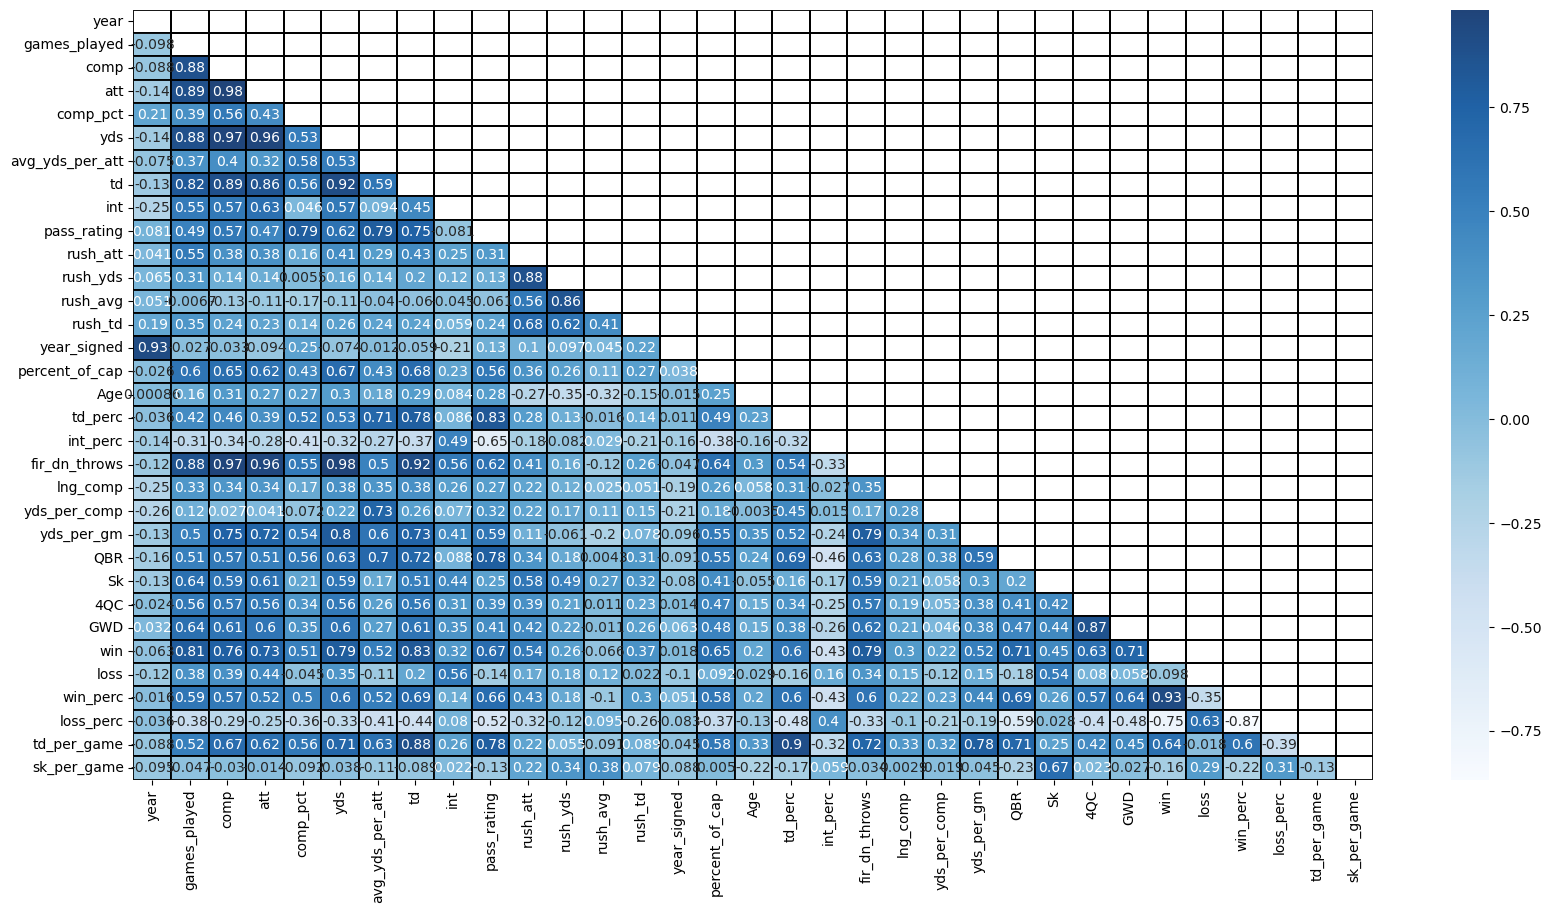

In [326]:
kwargs= {'alpha':.9, 'linewidth':.3, 'linestyle':'-',
        'linecolor':'k', 'rasterized':False, 'edgecolor':'w',
        'capstyle':'projecting',}

plt.figure(figsize=(20,10))
sns.heatmap(feature_corr, cmap='Blues', annot=True, mask = np.triu(feature_corr), **kwargs)


plt.show()

In [ ]:
['year', 'year_signed']

In [15]:
def correlation_tests(train, columns_list, target):
    '''
    Runs a correlation test on dataframe features vs target variable
    '''
    corr_df = pd.DataFrame({'feature': [],
                        'r': [],
                       'p': []})
    for i, col in enumerate(train[columns_list]):
        r, p = stats.pearsonr(train[col], train[target])
        corr_df.loc[i] = [col, abs(r), p]
    to_return = corr_df.sort_values(by='r', ascending=False)
    to_return['target'] = target
    return to_return

In [54]:
target = 'percent_of_cap'
columns_list = df.select_dtypes(exclude=['object']).drop(columns=target).columns.to_list()


In [55]:
columns_list

['year',
 'games_played',
 'comp',
 'att',
 'comp_pct',
 'yds',
 'avg_yds_per_att',
 'td',
 'int',
 'pass_rating',
 'rush_att',
 'rush_yds',
 'rush_avg',
 'rush_td',
 'year_signed',
 'Age',
 'td_perc',
 'int_perc',
 'fir_dn_throws',
 'lng_comp',
 'yds_per_comp',
 'yds_per_gm',
 'QBR',
 'Sk',
 '4QC',
 'GWD',
 'win',
 'loss',
 'win_perc',
 'loss_perc',
 'td_per_game',
 'sk_per_game']

In [56]:
correlation_tests(train, columns_list, target).reset_index().drop(columns = 'index')

,feature,r,p,target
0,td,0.659486,1.881538e-35,percent_of_cap
1,yds,0.646075,1.199544e-33,percent_of_cap
2,win,0.645542,1.408810e-33,percent_of_cap
3,comp,0.630652,1.110033e-31,percent_of_cap
4,fir_dn_throws,0.624198,6.851105e-31,percent_of_cap
5,att,0.602152,2.521559e-28,percent_of_cap
6,win_perc,0.578082,9.658709e-26,percent_of_cap
7,td_per_game,0.570773,5.343543e-25,percent_of_cap
8,games_played,0.562537,3.491778e-24,percent_of_cap
9,pass_rating,0.555235,1.766582e-23,percent_of_cap


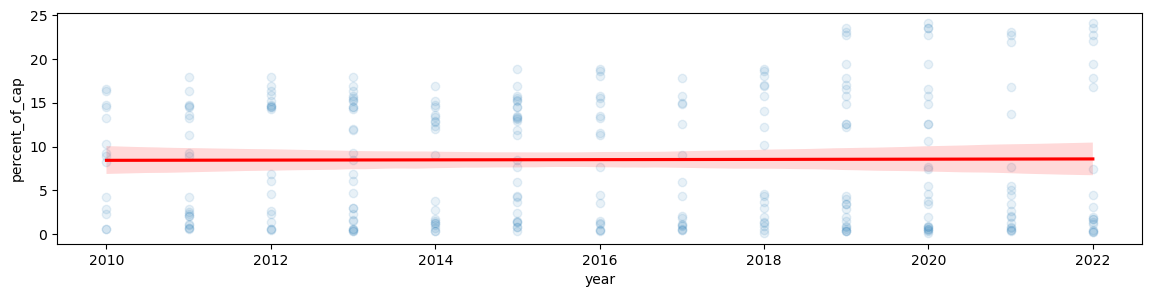

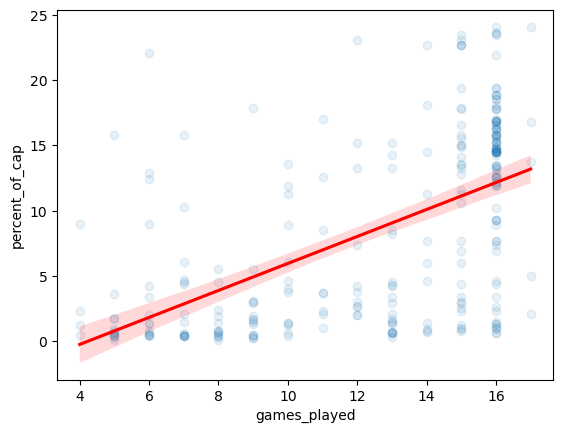

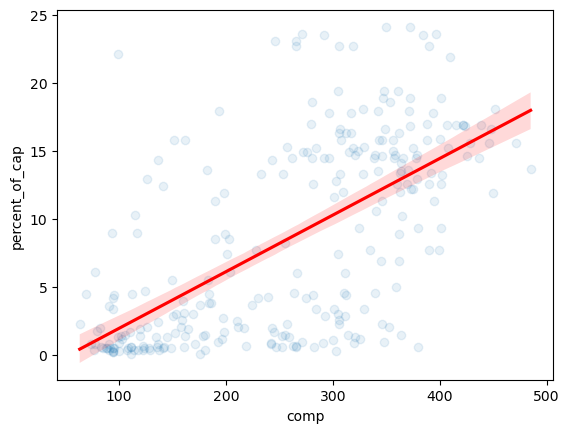

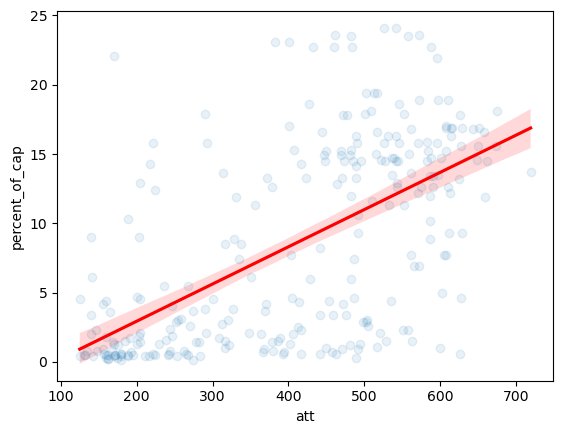

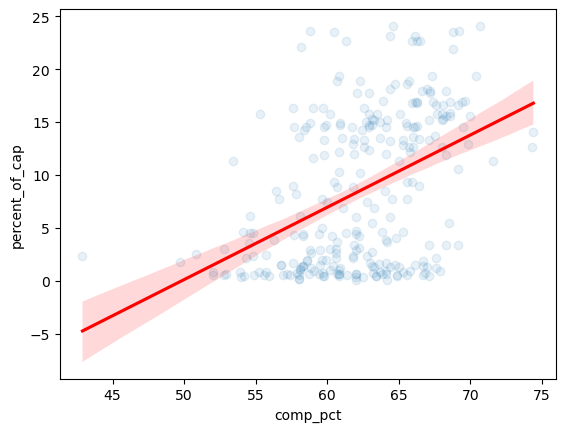

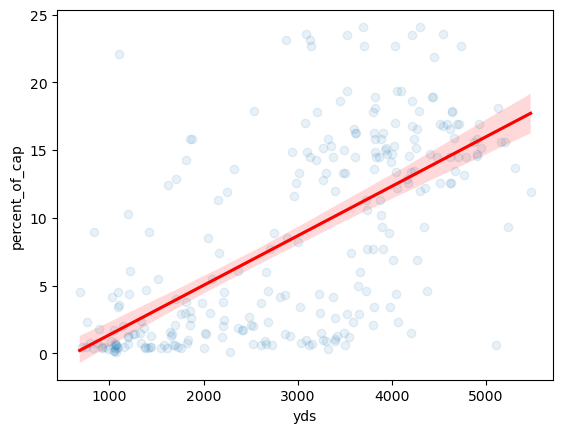

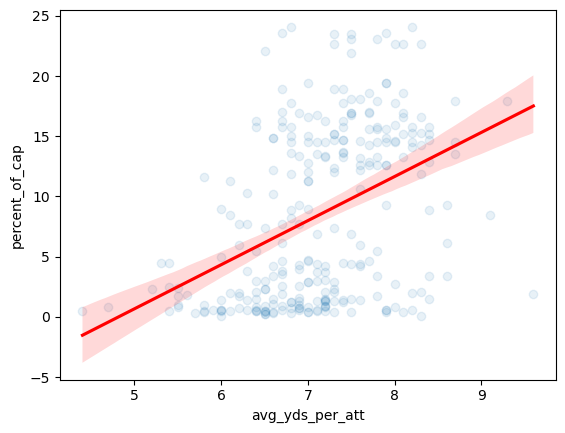

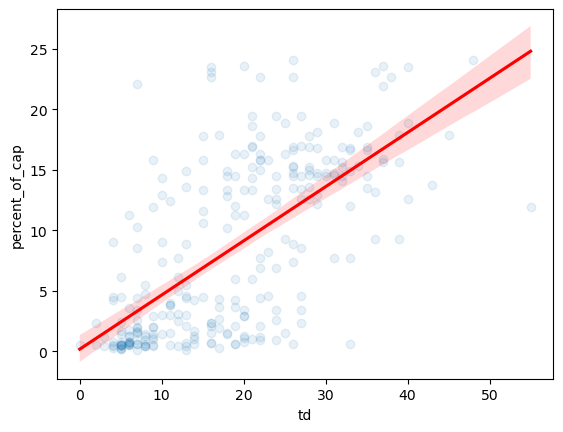

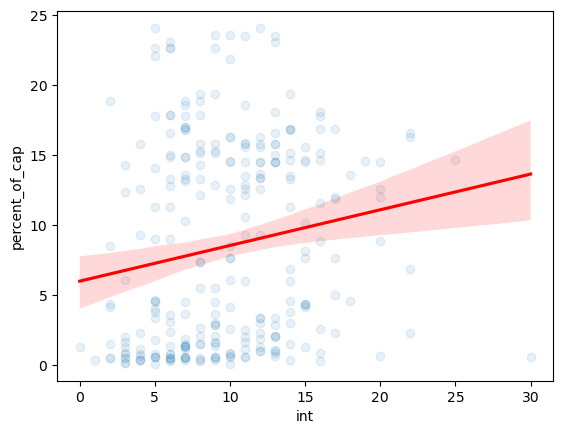

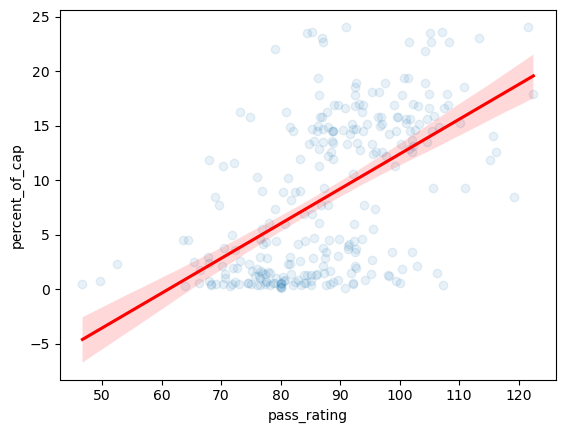

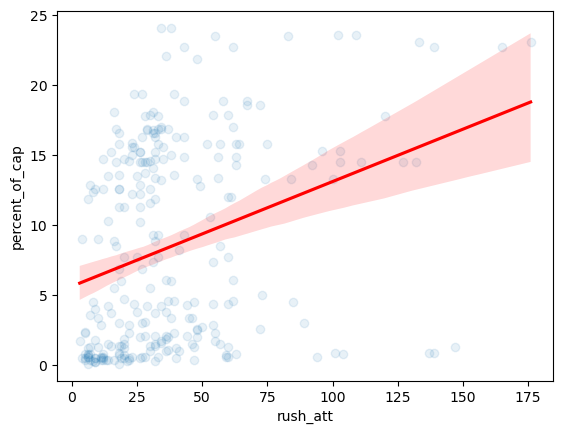

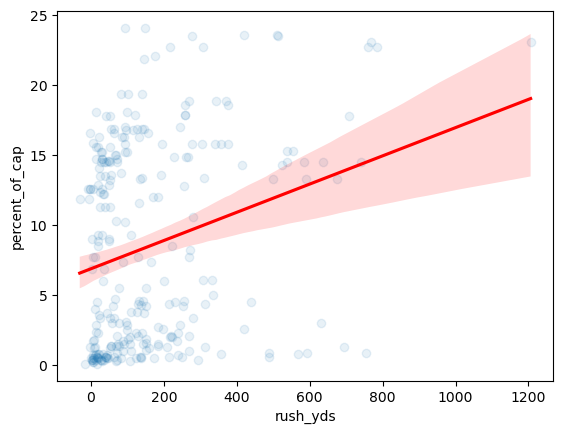

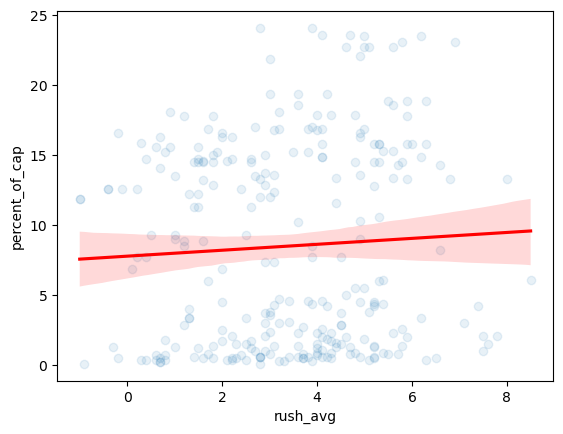

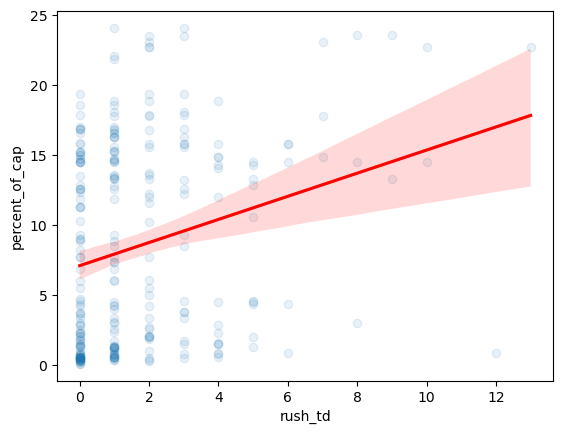

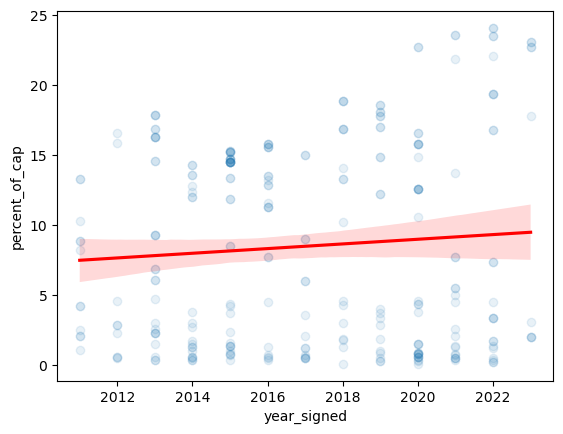

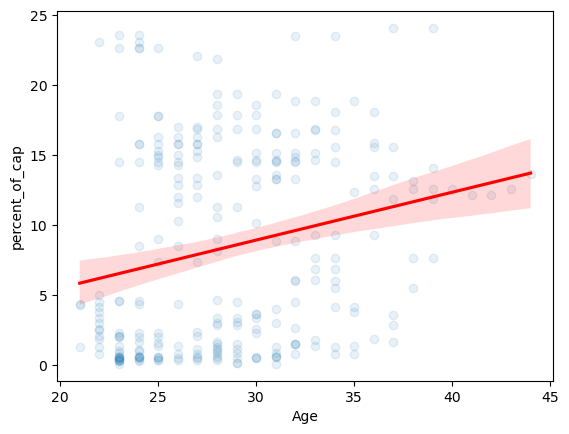

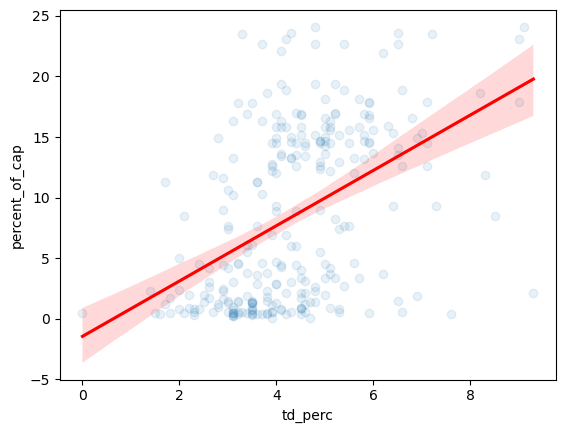

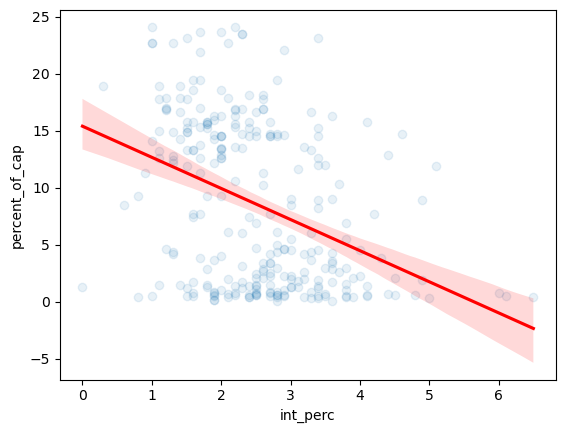

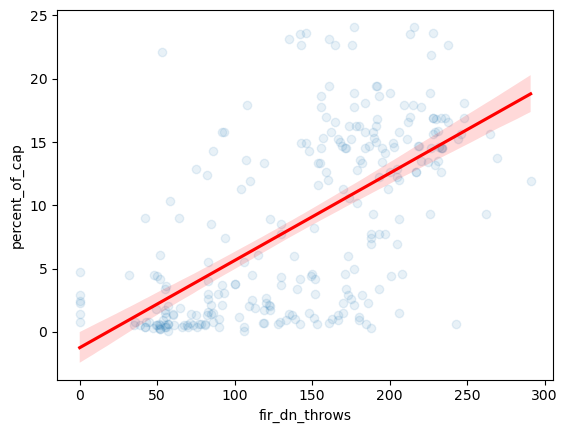

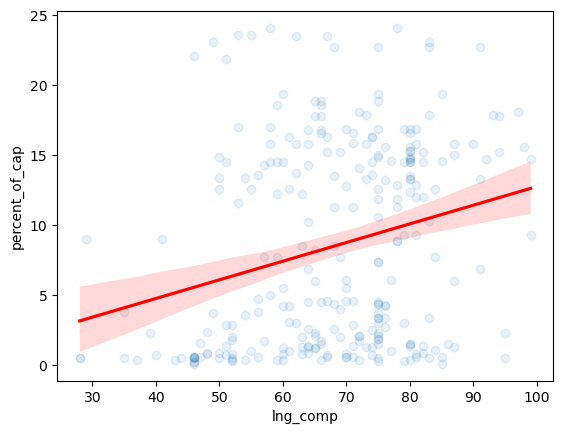

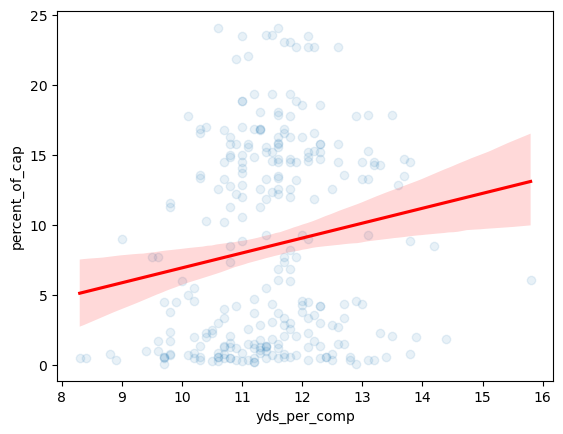

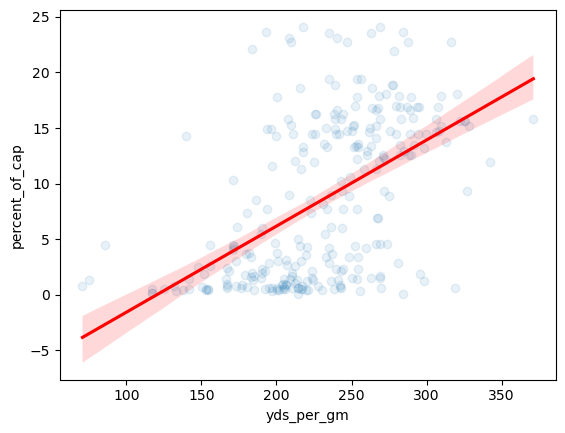

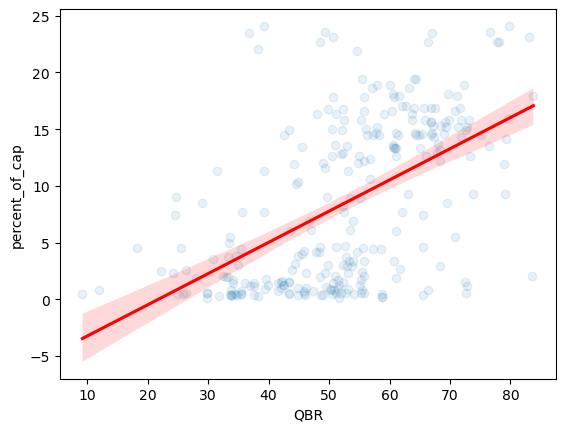

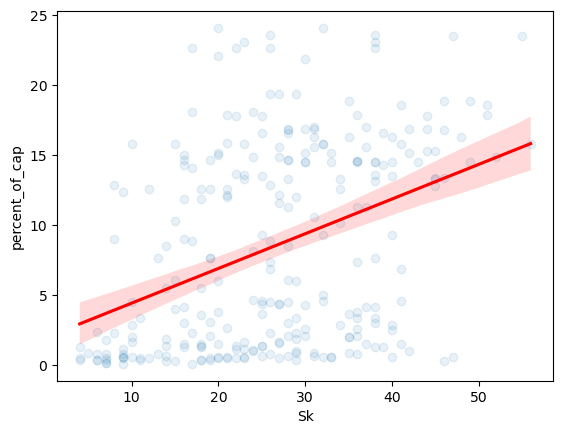

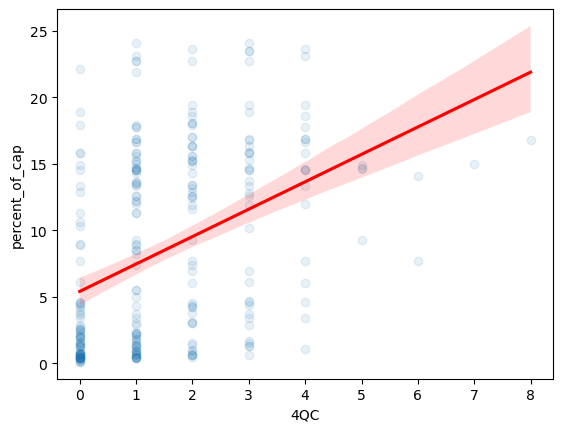

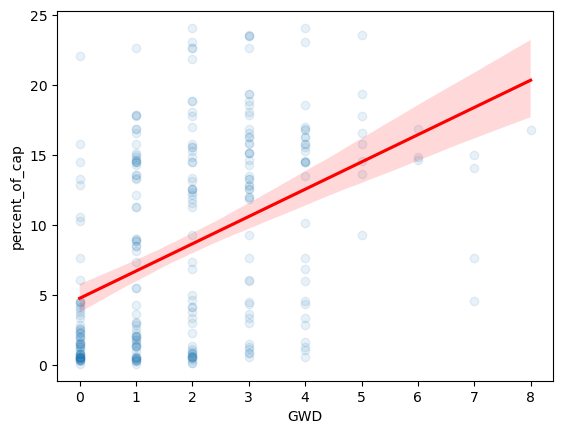

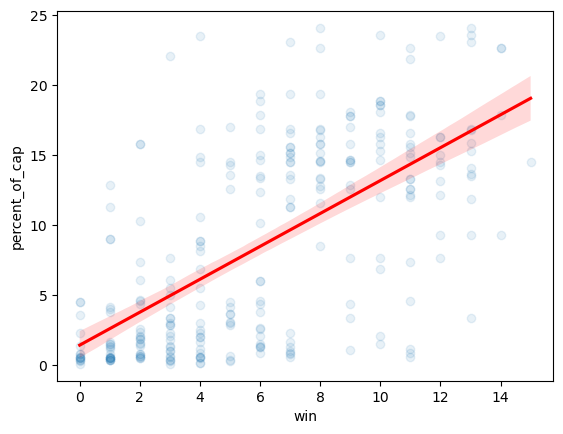

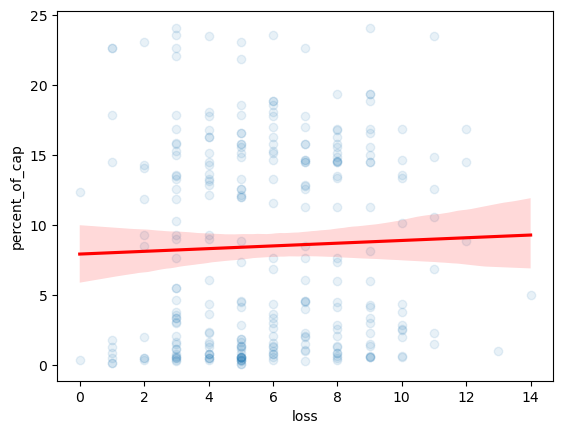

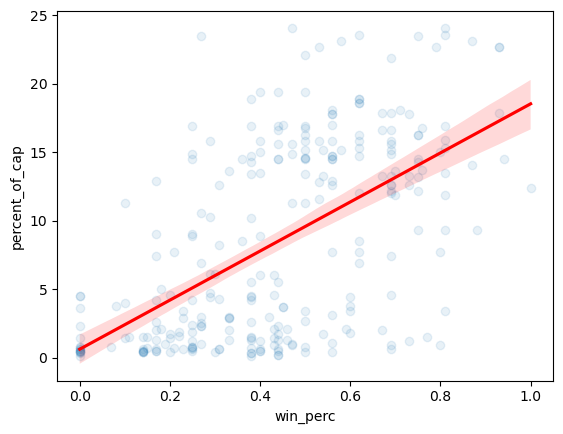

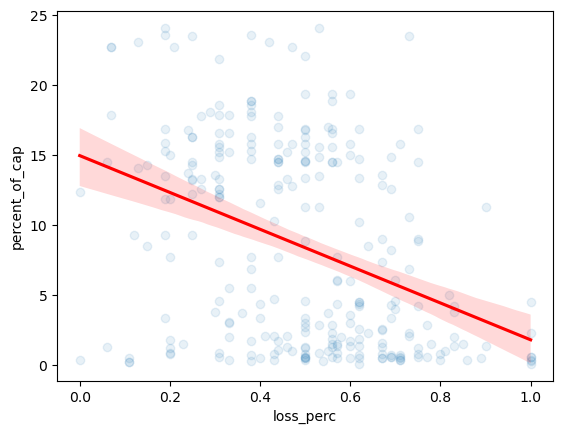

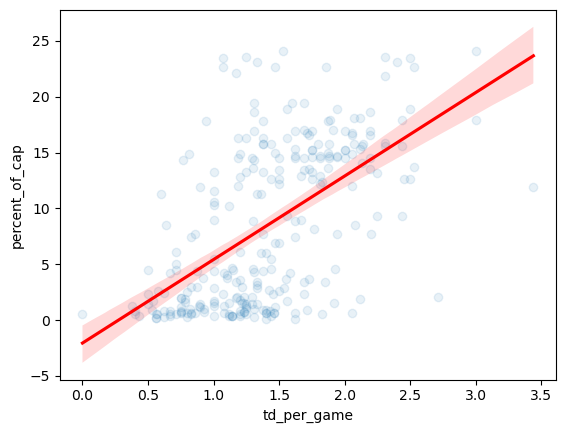

In [196]:
w.correlation_charts(train, columns_list, target)

In [57]:
X_train, X_validate, X_test, y_train, y_validate, y_test = w.get_X_train_val_test(train, validate, test, columns_list, target)                                                                           

In [58]:
X_train

,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,...,QBR,Sk,4QC,GWD,win,loss,win_perc,loss_perc,td_per_game,sk_per_game
91,2012,16.0,338.0,527.0,64.1,3606.0,6.8,26.0,15.0,88.63,...,42.6,49,0.0,0.0,7,9,0.44,0.56,1.62,3.06
180,2019,14.0,319.0,484.0,65.9,4031.0,8.3,26.0,5.0,105.31,...,77.7,17,1.0,1.0,11,3,0.79,0.21,1.86,1.21
360,2022,4.0,103.0,175.0,58.9,1192.0,6.8,3.0,4.0,75.70,...,37.0,9,0.0,0.0,1,3,0.25,0.75,0.75,2.25
243,2015,7.0,162.0,293.0,55.3,1881.0,6.4,15.0,12.0,74.91,...,52.4,15,1.0,2.0,2,5,0.29,0.71,2.14,2.14
76,2014,6.0,126.0,204.0,61.8,1710.0,8.4,10.0,9.0,86.44,...,52.3,8,0.0,0.0,1,4,0.17,0.67,1.67,1.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2017,7.0,126.0,204.0,61.8,1699.0,8.3,19.0,8.0,102.96,...,83.5,19,0.0,0.0,3,3,0.43,0.43,2.71,2.71
202,2018,16.0,99.0,170.0,58.2,1201.0,7.1,6.0,3.0,84.46,...,42.6,16,0.0,1.0,6,1,0.38,0.06,0.38,1.00
141,2011,10.0,199.0,328.0,60.7,2751.0,8.4,13.0,16.0,80.48,...,53.5,17,0.0,1.0,4,5,0.40,0.50,1.30,1.70
390,2013,8.0,137.0,253.0,54.2,1760.0,7.0,9.0,6.0,78.17,...,48.6,19,0.0,0.0,0,8,0.00,1.00,1.12,2.38


In [59]:
drop_cols = ['Age']

In [60]:
def Xy_train_val_test(train, validate, test, target_variable, drop_cols):
    """
    input train, validate, test, after using split function()
    input target_variable as string
    drop_cols formatted as: ['col1', 'col2', 'etc'] for multiple columns
        This function will drop all 'object' columns. Identify additional 
        columns you want to drop and insert 1 column as a string or multiple
        columns in a list of strings.
    returns:
    X_train, X_validate, X_test, y_train, y_validate, y_test
    """
    
    baseline_accuracy = train[target_variable].mean()
    print(f'Baseline Accuracy: {baseline_accuracy}')
    
    X_train = train.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_validate = validate.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_test = test.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    
    y_train = train[target_variable]
    y_validate = validate[target_variable]
    y_test = test[target_variable]
    
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [61]:
X_train, X_validate, X_test, y_train, y_validate, y_test = Xy_train_val_test(train, validate, test, target, drop_cols)

Baseline Accuracy: 8.512087912087916


In [62]:
X_train, X_validate, X_test = w.scale_data(X_train, X_validate, X_test, cols = X_train.columns)

In [63]:
df1, df2, df3 = w.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:294: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

In [233]:
df1

,model_train,rmse,r2
0,baseline,7.175664,0.000000
1,ordinary least squared(OLS),4.600045,0.589040
2,lasso lars(lars),7.175664,0.000000
3,Polynomial Regression(poly2),0.074294,0.999893
4,Generalized Linear Model (GLM),5.309060,0.452592


In [64]:
df1

,model_train,rmse,r2
0,baseline,7.175664,0.000000
1,ordinary least squared(OLS),4.599478,0.589141
2,lasso lars(lars),7.175664,0.000000
3,Polynomial Regression(poly2),0.074289,0.999893
4,Generalized Linear Model (GLM),5.362984,0.441416


In [234]:
df2

,model_validate,rmse,r2
0,baseline,7.175664e+00,0.000000e+00
1,ordinary least squared(OLS),5.416028e+00,3.824427e-01
2,lasso lars(lars),6.896546e+00,-1.333225e-03
3,Polynomial Regression(poly2),2.428278e+08,-1.241401e+15
4,Generalized Linear Model (GLM),5.982963e+00,2.463875e-01


In [65]:
df2

,model_validate,rmse,r2
0,baseline,7.175664e+00,0.000000e+00
1,ordinary least squared(OLS),5.418699e+00,3.818335e-01
2,lasso lars(lars),6.896546e+00,-1.333225e-03
3,Polynomial Regression(poly2),5.008836e+07,-5.281885e+13
4,Generalized Linear Model (GLM),6.020758e+00,2.368363e-01


In [ ]:
# read in information from clipboard to prep for new merge
fake = pd.read_clipboard()

In [ ]:
fake

#### Code to split win and loss column

In [ ]:
# split up record column into a win and a loss column
fake = fake.assign(win=fake['QBrec'].str.split('-').str[0].astype(int),
                   loss=fake['QBrec'].str.split('-').str[1].astype(int))

In [ ]:

fake

#### Columns we want to merge

In [ ]:
# rename columns we want to merge
fake.rename(columns={'TD%': 'td_perc', 'Int%': 'int_perc', '1D':'fir_dn_throws', 'Lng':'lng_comp', 'Y/C':'yds_per_comp', 'Y/G':'yds_per_gm'})

In [ ]:
# isolating columns to merge
['Age', 'td_perc', 'int_perc', 'fir_dn_throws', 'lng_comp', 'yds_per_comp', 'yds_per_gm', 'QBR', 'Sk', '4QC', 'GWD', 'win', 'loss']

In [ ]:
# making sure we don't pull over duplicate columns by checking column names
train.head()

#### Cleaning the player name to merge df's

In [ ]:
# Function to clean the names
def clean_name(name):
    cleaned_name = re.sub(r'[^\w\s]+$', '', name)
    return cleaned_name

In [ ]:
# Applying the cleaning function to the 'Name' column
fake['Player'] = fake['Player'].apply(clean_name)

In [332]:
from sklearn.cluster import KMeans

In [348]:
def clusters(train, var1, var2, clusters=5):
    '''
    
    '''
    train_X=train[[var1, var2]]
    #Initialize the KMeans model and fit it to my features
    # MAKE the thing
    train_kmeans=KMeans(clusters)
    # FIT the thing
    train_kmeans.fit(train_X)
    #USE the thing
    train_kmeans.predict(train_X)
    train['cluster'] = train_kmeans.predict(train_X)
    # scatter plot of data with hue for cluster
    sns.scatterplot(x = var1, y = var2, data = train, hue = 'cluster')
    # plot cluster centers (centroids)
    # centroids.plot.scatter(x = var1, y = var2, ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')
    # plt.title('Visualizing Cluster Centers')
    # Get unique cluster labels
    unique_clusters = train['cluster'].unique()
    # Create legend labels for clusters
    cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left');
    plt.show()

In [354]:
train.columns

Index(['name', 'team', 'year', 'games_played', 'comp', 'att', 'comp_pct',
       'yds', 'avg_yds_per_att', 'td', 'int', 'pass_rating', 'rush_att',
       'rush_yds', 'rush_avg', 'rush_td', 'full_name', 'year_signed',
       'percent_of_cap', 'Player', 'Age', 'td_perc', 'int_perc',
       'fir_dn_throws', 'lng_comp', 'yds_per_comp', 'yds_per_gm', 'QBR', 'Sk',
       '4QC', 'GWD', 'win', 'loss', 'win_perc', 'loss_perc', 'td_per_game',
       'sk_per_game', 'cluster'],
      dtype='object')

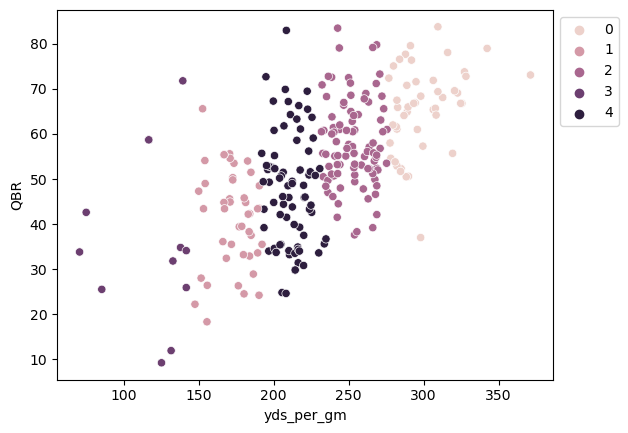

In [361]:
clusters(train, 'yds_per_gm', 'QBR', 5)

In [381]:
df[df.name=='Brock Purdy']

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap,Player,Age,td_perc,int_perc,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss,win_perc,loss_perc,td_per_game,sk_per_game
327,Brock Purdy,SF,2022,9.0,114.0,170.0,67.1,1374.0,8.1,13.0,4.0,107.33,22.0,13.0,0.6,1.0,Brock Purdy,2022,0.4,Brock Purdy,23,7.6,2.4,66,54,12.1,152.7,65.6,11,1.0,1.0,5,0,0.56,0.0,1.44,1.22
